<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Spatial Data Analytics 

### Interactive Demonstration of Variogram h-Scatterplots 

#### Michael Pyrcz, Professor, The University of Texas at Austin 

##### Contacts: [Twitter/@GeostatsGuy](https://twitter.com/geostatsguy) | [GitHub/GeostatsGuy](https://github.com/GeostatsGuy) | [www.michaelpyrcz.com](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446)

This a simple demonstration of the variogram h-scatterplot for a 1D datasets with variable spatial continuity and visualization.

* we will see the correlogram (equal to the covariance function when the sill, variance is 1.0) is the correlation coefficient of the h-scatterplot. 

* there is some deviation due to the lag effect, the edge effect with variogram calculation that excludes some of the data (e.g., at large lags only the samples at the edges of the area of interest are included in the pairs)

* we will perform the calculations in 1D for fast run times and ease of visualization.

Please cite this code as:

Pyrcz, Michael J. (2021). PythonNumericalDemos: Educational Data Science Demonstrations Repository (1.0.0). Zenodo. https://doi.org/10.5281/zenodo.5564991

#### Load the required libraries

The following code loads the required libraries.

In [1]:
supress_warnings = True
import numpy as np                                          # arrays
import matplotlib.pyplot as plt                             # plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
import pandas as pd                                         # dataframes
from geostatspy import GSLIB                                # affine correction
from ipywidgets import interactive                          # plotting widgets and interactivity
from ipywidgets import widgets                            
from ipywidgets import Layout
from ipywidgets import Label
from ipywidgets import VBox, HBox
cmap = plt.cm.inferno                                     # default color bar, no bias and friendly for color vision defeciency
plt.rc('axes', axisbelow=True)                            # grid behind plotting elements
if supress_warnings == True:
    import warnings                                       # supress any warnings for this demonstration
    warnings.filterwarnings('ignore')       

#### Declar Functions

In [2]:
def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).  Also, in this case make sure to place the required (see below) data file in this working directory. 

In [3]:
#os.chdir("C:\PGE337")                                      # set the working directory

#### Load the Dataset

It is a small 1D dataset available on my GitHup [GeoDataSets](https://github.com/GeostatsGuy/GeoDataSets) repository.

Datasets are cited as: 

* Pyrcz, Michael J. (2021). GeoDataSets: Synthetic Subsurface Data Repository (1.0.0). Zenodo. https://doi.org/10.5281/zenodo.5564874

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/1D_Porosity.csv')
npor = df['Nporosity']
npor = GSLIB.affine(npor,0.0,1.0)                           # ensure variance is 1.0 for results to work below
df.head()

,Depth,Nporosity
0,0.25,-1.37
1,0.50,-2.08
2,0.75,-1.67
3,1.00,-1.16
4,1.25,-0.24


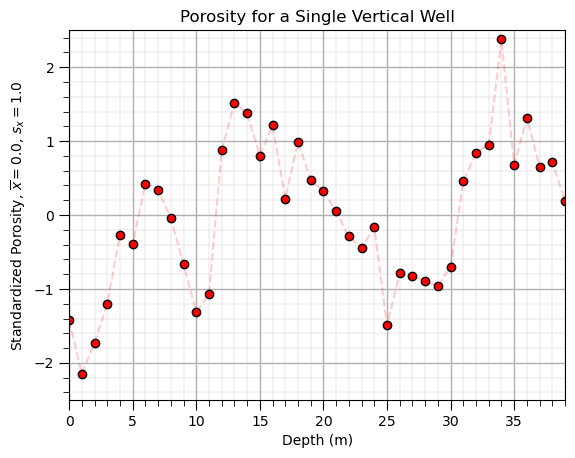

In [5]:
plt.plot(npor,color='red',ls='--',alpha=0.2,zorder=1)
plt.scatter(np.arange(0,len(npor),1),npor,color='red',edgecolor='black',zorder=1)
plt.xlabel('Depth (m)'); plt.ylabel(r'Standardized Porosity, $\overline{x} = 0.0$, $s_x = 1.0$'); plt.title('Porosity for a Single Vertical Well')
plt.xlim([0,39]); plt.ylim([-2.5,2.5]); add_grid()

Notice that we ensured that the dataset variance is 1.0 as we assume this to calculate the correlogram below.

#### Interactive Interface

Here's the interactive interface. I calculate the variogram, plot the h-scatterplot and calculate and annotate the correlogram / h-scatterplot correlation coefficient.  

* the user specifies lag to investigate

In [6]:
l = widgets.Text(value='                                Variogram h-Scatterplot Demonstration, Prof. Michael Pyrcz, The University of Texas at Austin',
                 layout=Layout(width='930px', height='30px'))

lag = widgets.IntSlider(min=1,max = 40,value=5,step = 1,description = 'Lag',orientation='horizontal',style = {'description_width': 'initial'},layout=Layout(width='940px',height='30px'),continuous_update=False)

ui2 = widgets.VBox([l,lag],)

def run_plot(lag): 
    size = 0.25
    gamma = np.average(np.square((npor - npor.shift(lag)).dropna()))*0.5
    gamma_all = []; num_pairs_all = []
    for ilag in range(0,40):
        num_pairs_all.append(len((npor - npor.shift(ilag)).dropna()))
        gamma_all.append(np.average(np.square((npor - npor.shift(ilag)).dropna()))*0.5)    
    
    npor_shift = npor.shift(lag)
    correl = np.round(np.corrcoef(npor[~np.isnan(npor_shift)],npor_shift[~np.isnan(npor_shift)]),2)[0][1]
    
    plt.subplot(131)
    scatter = plt.scatter(np.arange(0,40)*size,gamma_all,s=num_pairs_all,color='red',edgecolor='black')
    plt.scatter(lag*size,gamma,color='darkorange',edgecolor='black',s=40,zorder=10)
    plt.plot([lag*size,lag*size],[0,gamma],color='black',ls='--',zorder=1)
    plt.plot([lag*size,lag*size],[1.0,gamma],color='red',ls='--',zorder=1)
    if gamma < 1.0:
        plt.plot([lag*size,lag*size+0.1],[gamma,gamma+0.1],color='red',zorder=1)
        plt.plot([lag*size,lag*size-0.1],[gamma,gamma+0.1],color='red',zorder=1)
    else:
        plt.plot([lag*size,lag*size+0.1],[gamma,gamma-0.1],color='red',zorder=1)
        plt.plot([lag*size,lag*size-0.1],[gamma,gamma-0.1],color='red',zorder=1)
    plt.plot([0,lag*size],[gamma,gamma],color='black',ls='--',zorder=1)
    plt.plot([0,10],[1.0,1.0],color='black')
    plt.xlim([0,10]); plt.ylim([0,3]); plt.title('Experimental Variogram')
    plt.annotate(r'$\gamma(\bf{h}) =$ ' + str(np.round(gamma,2)),[lag*size+0.2,(gamma)/2])
    plt.annotate(r'$\bf{h} =$ ' + str(lag*size),[lag*size-0.3,0.03],rotation=90)
    plt.annotate(r'$\sigma^2 - \gamma(\bf{h}) =$ ' + str(np.round(1.0-gamma,2)),
        [lag*size+0.2,(gamma+1.0)/2],color='red')
    plt.xlabel(r'$\bf{h}$ Lag Distance'); plt.ylabel(r'$\gamma(\bf{h})$ Variogram')
    add_grid()
    legend = plt.legend(*scatter.legend_elements("sizes", num=4),loc='upper left')
    legend.set_title('Number of Pairs')
    
    plt.subplot(132)
    #plt.plot(npor,color='red',ls='--',alpha=0.2,zorder=1)
    n = 0
    for itail in range(0,len(npor)):
        if itail + lag < len(npor)-1:
            plt.plot([itail,itail+lag],[npor[itail],npor[itail+lag]],color='gray',alpha=0.4,zorder=1) 
            n = n + 1
    itail = 0.0 
    while itail < len(npor)-1:
        if itail + lag < len(npor)-1:
            plt.plot([itail,itail+lag],[npor[itail],npor[itail+lag]],color='black',lw=2,zorder=2)
        itail = itail + lag + 1
    plt.scatter(np.arange(0,len(npor),1),npor,color='red',edgecolor='black',zorder=1)
    plt.xlabel('Depth (m)'); plt.ylabel(r'Standardized Porosity, $\overline{x} = 0.0$, $s_x = 1.0$'); plt.title('Standardized Porosity for a Single Vertical Well and Pairs for Lag = ' + str(lag))
    plt.annotate('Number of Pairs = ' + str(n),[25,-2.3])
    plt.xlim([0,39]); plt.ylim([-2.5,2.5]); add_grid()
    
    plt.subplot(133)
    plt.scatter(npor,npor.shift(lag),color='darkorange',edgecolor='black',s=20)
    plt.plot([-3,3],[-3,3],color='black')
    plt.xlim([-3,3]); plt.ylim([-3,3]); 
    plt.title(r'h-Scatter Plot, lag = ' + str(lag) + r', $\bf{h} =$ ' + str(lag*size))
    plt.xlabel(r'$Z(\bf{u})$ Tail'); plt.ylabel(r'$Z(\bf{u}+ \bf{h})$ Head')
    plt.annotate(r'$\rho_{Z(\bf{u}),Z(\bf{u} + \bf{h})}$ = ' + str(correl),[1.0,-2.5],fontsize=12)
    add_grid()
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2.6, top=0.9, wspace=0.2, hspace=0.3); plt.show()
    
# connect the function to make the samples and plot to the widgets    
interactive_plot = widgets.interactive_output(run_plot, {'lag':lag})
interactive_plot.clear_output(wait = True)               # reduce flickering by delaying plot updating    
    

### Interactive Variogram h-scatterplot Demonstration 

#### Michael Pyrcz, Professor, The University of Texas at Austin 

Change the number of sample data, train/test split and the data noise and observe overfit! Change the model order to observe a specific model example.

### The Inputs

* **lag** - the lag number to calculate, h = lag $\times$ data spacing

In [7]:
display(ui2, interactive_plot)                           # display the interactive plot

Output(outputs=({'output_type': 'display_data', 'metadata': {}, 'data': {'text/plain': '<Figure size 640x480 w…

#### Comments

This was an interactive demonstration of the variogram h-scatter plot. 

I have many other demonstrations on simulation to build spatial models with spatial continuity and many other workflows available [here](https://github.com/GeostatsGuy/PythonNumericalDemos), along with a package for geostatistics in Python called [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy). 
  
We hope this was helpful,

*Michael*

***

#### More on Michael Pyrcz and the Texas Center for Geostatistics:

### Michael Pyrcz, Professor, The University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
